## Code submission

If you would like to use Jupyter (perhaps the easiest way), just submit the notebook file to bCourses. Name it lastname_firstname_(Homework#).ipynb. For example, obama_barack_1.ipynb. This applies to the case if you **only** have a notebook file.

If you use MATLAB or Julia/Python (not the notebook), **or** if you have multiple files, name your programs as p(Homework#)_(Problem#).m. For instance, for homework 1, problem 2, name it as p1_2.m (or p1_2.jl,p1_2.py). Then **zip everything** into a single file lastname_firstname_(Homework#).zip, and submit the zip file to bCourses. For example, obama_barack_1.zip.

For proof-related problems, type your solution using **LaTeX (no other format is accepted)**. You do not need to write down every step of the derivation, but make sure the logic is clear and understandable.

For implementation based problems, the problem description may not include all the information for the answer to be uniquely defined. For instance, your answer might depend on the choice of the mesh size. This is OK.

## Problem 1

The 2-stage Milne's method is

$$u_{n+1}=u_{n-1}+h\left(\frac{1}{3}f_{n+1}+\frac{4}{3}f_n+\frac{1}{3}f_{n-1}\right).$$

Prove with analytic computation that 

1. It is a 4th order method.

2. The region of absolute stability of is only along the imaginary axis.

1) From homework 2, we have that 2-stage Milne's method has LTE of $O(h^5)$. We analyze zero stability as follows:
$$\begin{equation} \label{eq1}
\begin{split}
\rho (\lambda) &= \lambda^n - \lambda^{n-2} \\
&= \lambda^{n-2}(\lambda^{2}-1)
\end{split}
\end{equation}$$
which has roots $z = 0$ with multiplcity $n-2$ and $z = \pm1$ which are simple. Thus the method is both consistent, with LTE = $O(h^5)$ and zero stable, so we have convergence to $O(h^{p-1}) = O(h^4)$. \
2) Let $\dot{u} = \lambda u$ and let $z = \lambda h$, so we have 
$$\begin{equation} \label{eq2}
\begin{split}
u_{n+1}&=u_{n-1}+\frac{h}{3}(\lambda u_{n+1}+4\lambda u_{n}+\lambda u_{n-1}) \\ 
&= u_{n-1}+\frac{z}{3}(u_{n+1}+4u_{n}+u_{n-1}) \\
\Rightarrow z &= \frac{3(u_{n+1}-u_{n-1})}{u_{n+1}+4u_{n}+u_{n-1}} \\
\Rightarrow z &= \frac{3(\omega^2-1)}{\omega^2+4\omega+1} \\
&= \frac{3(e^{2i\theta}-1)}{e^{2i\theta}+4e^{i\theta}+1} \\
&= \frac{3(\text{cos}(2\theta)+i \text{sin}(2\theta)-1)}{\text{cos}(2\theta)+i \text{sin}(2\theta)+4\text{cos}(\theta)+4i \text{sin}(\theta)+1}
\end{split}
\end{equation}$$
Multiplying by conjugate we have
$$
z=\frac{3(\text{cos}(2\theta)+i \text{sin}(2\theta)-1)(2(\text{cos}(\theta)+2)(\text{cos}(\theta)-i \text{sin}(\theta)))}{4(\text{cos}(\theta)+2)^2}
$$
so the top simplifies to
$$
z=\frac{3(4i\text{sin}(\theta)(\text{cos}(\theta)+2))}{4(\text{cos}(\theta)+2)^2},
$$
so $Re(z) = 0$, meaning the region of absolute stability is only along the imaginary axis.

## Problem 2

Consider the ODE 

$$u'(t) = \lambda (u − \cos t) − \sin t, \quad u(0) = u_0,$$

with the exact solution

$$u(t) = e^{\lambda t}(u_0 − 1) + \cos t.$$

Solve the equation and compare with the exact solution using 

a) The trapezoidal method

b) The backward Euler method

for $0\le t \le 3$. Use the parameter $\lambda=-10^6,u_0=1.5,\Delta t = 0.1$. 

Why trapezoidal rule seems to be less accurate? Repeat with $\Delta t=0.001$. Explain the difference in terms of the behavior $R(z)$ at $z=\infty$.

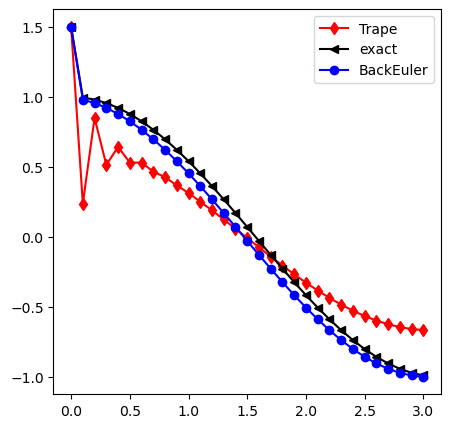

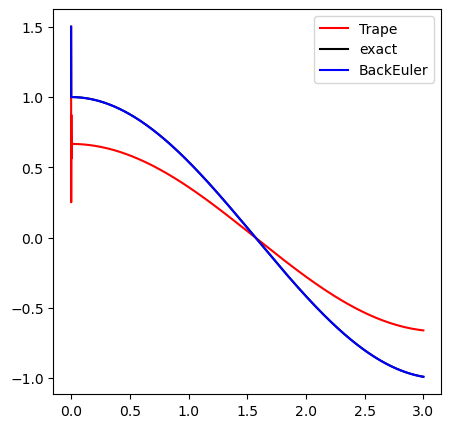

PyObject <matplotlib.legend.Legend object at 0x0000000000E359A0>

In [36]:
function BackEuler(N,T,u0,lambda)
    h = T/N
    u = zeros(N+1)
    u[1] = u0
    for i = 1:N
        u[i+1] = (u[i]-h*lambda*cos(h*(i+1))-h*sin(h*(i+1)))/(1-h*lambda)
    end
    return u
end

function Trape(N,T,u0,lambda)
    h = T/N
    u = zeros(N+1)
    u[1] = u0
    for i = 1:N
        u[i+1] = (u[i]+
                h/2*(lambda*(u[i]-cos(h*i))
                -sin(h*i)
                -lambda*cos(h*(i+1))
                -sin(h*(i+1))))/(1-h*lambda)
    end
    return u
end


u0 = 1.5
lambda = -1.0e+6
T = 3.0
dt = 0.1
N = round(Int64,T/dt)
t = collect(0:N)*dt
uexact = exp.(lambda*t)*(u0-1)+cos.(t)
uBackEuler = BackEuler(N,T,u0,lambda)
uTrape     = Trape(N,T,u0,lambda)

using PyPlot
figure(1,figsize=(5,5))
plot(t,uTrape,"r-d",label="Trape")
plot(t,uexact,"k-<",label="exact")
plot(t,uBackEuler,"b-o",label="BackEuler")
legend()

dt = 0.001
N = round(Int64,T/dt)
t = collect(0:N)*dt
uexact = exp.(lambda*t)*(u0-1)+cos.(t)
uBackEuler = BackEuler(N,T,u0,lambda)
uTrape     = Trape(N,T,u0,lambda)
figure(2,figsize=(5,5))
plot(t,uTrape,"r-",label="Trape")
plot(t,uexact,"k-",label="exact")
plot(t,uBackEuler,"b-",label="BackEuler")
legend()

## Problem 3

For the inhomogeneous linear equation.

$$u'(t)=\lambda u(t) + a,\quad a,u(t)\in\mathbb{R}.$$

Consider the Runge-Kutta method with Butcher tableau $A\in\mathbb{R}^{r\times r},b\in\mathbb{R}^{r},Re\lambda<0$

a) Prove that the numerical solution can be written as

$$u_n = R(\lambda h)^n u_0 + \left[\frac{R(\lambda h)^n-1}{R(\lambda h)-1}\right] h b^T(I-zA)^{-1}e a.$$

Here $e=(1,\ldots,1)^T\in\mathbb{R}^{r}$,

$$R(z)=1+zb^T(I-zA)^{-1}e.$$

b) Assume $|R(z)|<1$, prove that 

$$\lim_{n\to\infty} u_n=-\frac{a}{\lambda}.$$

Prove that the true solution of the ODE has the same limit, i.e.

$$\lim_{t\to+\infty} u(t)=-\frac{a}{\lambda}.$$

a) For Runge-Kutta, we have 

$$\begin{equation} \label{eq10}
\begin{split}
k &= f(u_ne+hAk \\
&= \lambda(u_ne+hAk) + ea \\
\end{split}
\end{equation}$$
$$
\Rightarrow k = \lambda u_n e+\lambda hAk+ ea 
$$
$$
\Rightarrow (I-\lambda hA)k = \lambda u_ne+ea
$$
$$
\Rightarrow k = (I-\lambda hA)^{-1}(\lambda u_ne+ea).
$$
Plugging into Runge-Kutta,
$$\begin{equation} \label{eq11}
\begin{split}
u_{n+1} &= u_n + hb^Tk \\
&= u_n + hb^T(I-\lambda hA)^{-1}(\lambda u_ne+ea) \\
&= u_n + b^T(I-z A)^{-1}(z u_ne+ hea) \\
&= u_n + zb^T(I-z A)^{-1}u_ne+hb^T(I-z A)^{-1}ea\\
&= u_n (1 + zb^T(I-z A)^{-1}e)+hb^T(I-z A)^{-1}ea\\
&= R(z)u_n+hb^T(I-z A)^{-1}ea.
\end{split}
\end{equation}$$
We have $$u_n = R(z)u_{n-1}+hb^T(I-z A)^{-1}ea, u_{n-1} = R(z)u_{n-2}+hb^T(I-z A)^{-1}ea,...$$
$$\begin{equation} \label{eq12}
\begin{split}
u_{n+1} &= R(z)^2u_{n-1}+(R(z)+1)hb^T(I-z A)^{-1}ea \\
u_{n+1} &= R(z)^3u_{n-2}+(R(z)^2+R(z)+1)hb^T(I-z A)^{-1}ea \\
&{}\ldots{} \\
u_{n+1} &= R(z)^{n+1}u_{0}+(R(z)^{n}+R(z)^{n-1}+...+R(z)+1)hb^T(I-z A)^{-1}ea \\
&= R(z)^{n+1}u_{0}+\frac{(R(z)^{n+1}-1)}{R(z)-1}hb^T(I-z A)^{-1}ea. \\
\end{split}
\end{equation}$$
Since $z = \lambda h$, we have
$$u_n = R(\lambda h)^n u_0 + \left[\frac{R(\lambda h)^n-1}{R(\lambda h)-1}\right] h b^T(I-zA)^{-1}e a$$
as desired. \
b) Firstly, we have
$$\begin{equation} \label{eq13}
\begin{split}
\lim_{n\to\infty} u_n &= \lim_{n\to\infty} R(\lambda h)^n u_0 + \left[\frac{R(\lambda h)^n-1}{R(\lambda h)-1}\right] h b^T(I-zA)^{-1}e a \\
&= 0 + \frac{0-1}{1+zb^T(I-zA)^{-1}-1}h b^T(I-zA)^{-1}e a \\
&= \frac{-1}{\lambda h b^T(I-zA)^{-1}}h b^T(I-zA)^{-1}e a \\
&= \frac{-a}{\lambda}
\end{split}
\end{equation}$$
Similarly, 
$$u'(t) = \lambda u(t)+a \Rightarrow \int\frac{1}{\lambda u(t)+a}du = \int 1 dt \\ \Rightarrow \frac{ln(\lambda u(t)+a)}{\lambda} = t+c \Rightarrow u(t) = \frac{-a}{\lambda} + \frac{1}{\lambda}e^{\lambda(t+c)}$$
Taking limit, we have
$$\lim_{t\to+\infty}\frac{-a}{\lambda} + \frac{1}{\lambda}e^{\lambda(t+c)} = \frac{-a}{\lambda}$$ as desired.

## Problem 4

Consider the heat equation in 1D with periodic boundary conditions

$$
u_t(x,t) = u_{xx}(x,t),\quad x\in [0,2\pi],
$$

$$
u(x,0)=e^{-5(x-\pi)^2}, \quad u(0,t)=u(2\pi,t), u_x(0,t)=u_x(2\pi,t)
$$

Use the central finite difference scheme to discretize $u_{xx}(x,t)$, with a uniform grid spacing $\Delta x=2\pi/50$, i.e.

$$
u_{xx}(x_i,t_n)\approx \frac{u(x_i+\Delta x,t_n)-2u(x_i,t_n)+u(x_i-\Delta x,t_n)}{\Delta x^2}.
$$

Implement the following embedded Runge-Kutta method with the Butcher table
$$
\begin{array}{c|ccc}{0} & {} \\ {\frac{2}{3}} & {\frac{2}{3}} \\ {\frac{2}{3}} & {0} & {\frac{2}{3}} \\ \hline & {\frac{1}{4}} & {\frac{3}{4}} \\ \hline  & {\frac{1}{4}}  & {\frac{3}{8}} & {\frac{3}{8}}\end{array}
$$
It has order $p=2$ (propagator), and $\tilde{p}=3$ (error estimator). 


1) Obtain the solution $u(x,T)$ at $T=1.0$ using an adaptive time stepping strategy (with the "Milne device").  The initial time step is $h=0.001$. Plot out the history of the size step along the history of the simulation. Enjoy the simplicity compared to the Trapezoidal-AB2 method.

2) What if you refine the grid spacing to $\Delta x=2\pi/200$? 

**Note**: You should implement this example using **sparse matrices** whenever possible. See 

https://docs.julialang.org/en/v1/stdlib/SparseArrays/index.html

for references on sparse linear algebra.

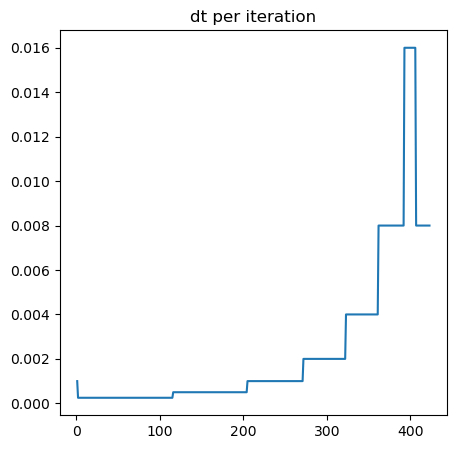

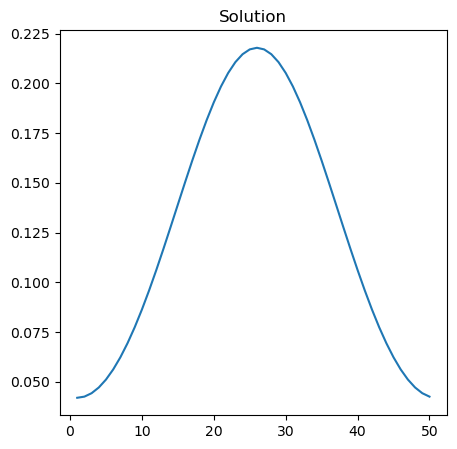

PyObject Text(0.5, 1.0, 'Solution')

In [73]:
using LinearAlgebra
using SparseArrays

function funcu(x)
   return exp.(.-5 .*(x.-pi).^2) 
end

dx = 2*pi/50
dt = 0.001
T = 1
x_pts = collect(0:dx:2*pi)
u0 = funcu(x_pts)
rows = vcat(collect(1:50), [50], collect(1:49), collect(2:50), [1])
cols = vcat(collect(1:50), collect(1:50), collect(1:50))
pts = vcat(ones(50)*-2, ones(100)*1)
A = 1/dx^2*sparse(rows, cols, pts)
delta = 1e-4

function prop(T,dt,u0,A)
    u = copy(u0)
    k1 = A*u
    k2 = A*(u + dt*2*k1/3)
    k3 = A*(u + dt*2*k2/3)
    u = u + dt*(k1/4 + 3*k2/4)
    return u
end

function est(T,dt,u0,A)
    u = copy(u0)
    k1 = A*u
    k2 = A*(u + dt*2*k1/3)
    k3 = A*(u + dt*2*k2/3)
    u = u + dt*(k1/4 + 3*k2/8 + 3*k3/8)
    return u
end

function rk23(T,dt,u0,A,delta)
    u = ones(size(A)[1], 1)
    cnt = 1
    t = 0
    dt_arr = [dt]
    u[:,1] = copy(u0)
    t += dt
    curr = u[:,cnt]
    utemp = prop(T,dt,curr,A)
    uest = est(T,dt,curr,A)
    while t <= T
        tau = 1/6*norm(utemp - uest)
        if tau > delta*dt
            dt = dt/2
            utemp = prop(T,dt,curr,A)
            uest = est(T,dt,curr,A)
        elseif tau <= 1/10*delta*dt
            cnt += 1
            t += dt
            dt_arr = vcat(dt_arr, dt)
            u = hcat(u, utemp)
            dt = 2*dt
            curr = u[:,cnt]
            utemp = prop(T,dt,curr,A)
            uest = est(T,dt,curr,A)
        else
            cnt += 1
            t += dt
            dt_arr = vcat(dt_arr, dt)
            u = hcat(u, utemp)
            curr = u[:,cnt]
            utemp = prop(T,dt,curr,A)
            uest = est(T,dt,curr,A)
        end
    end
    return u, dt_arr, cnt
end

using PyPlot

u, dt_arr, cnt = rk23(T,dt,u0,A,delta)
figure(6,figsize=(5,5))
plot(collect(1:length(dt_arr)), dt_arr)
title("dt per iteration")

figure(7,figsize=(5,5))
plot(collect(1:50), u[:,cnt])
title("Solution")

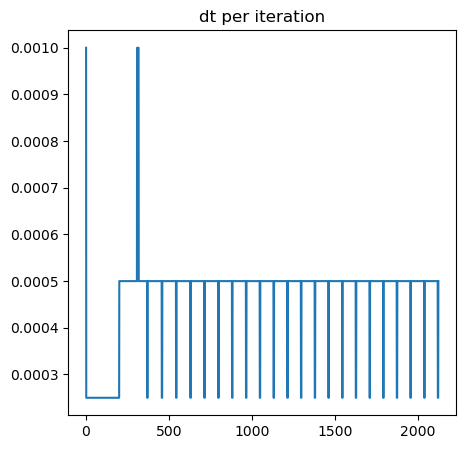

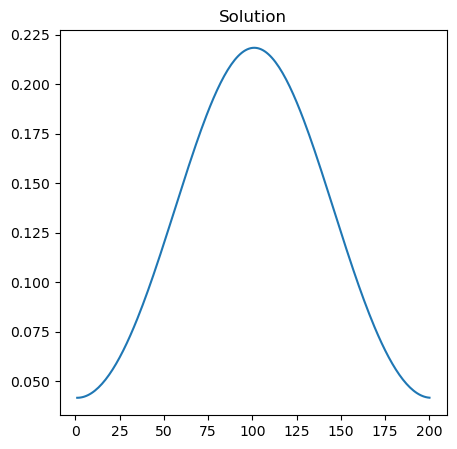

PyObject Text(0.5, 1.0, 'Solution')

In [35]:
dx = 2*pi/200
dt = 0.001
T = 1
x_pts = collect(0:dx:2*pi)
u0 = funcu(x_pts)
rows = vcat(collect(1:200), [200], collect(1:199), collect(2:200), [1])
cols = vcat(collect(1:200), collect(1:200), collect(1:200))
pts = vcat(ones(200)*-2, ones(400)*1)
A = 1/dx^2*sparse(rows, cols, pts)
delta = 1e-4

u, dt_arr, cnt = rk23(T,dt,u0,A,delta)
figure(6,figsize=(5,5))
plot(collect(1:length(dt_arr)), dt_arr)
title("dt per iteration")

figure(7,figsize=(5,5))
plot(collect(1:200), u[:,cnt])
title("Solution")

## Problem 5

The the 1-step Gauss-Legendre method can be written as
$$
u_{n+1}=u_n+h f\left(\frac{u_{n+1}+u_n}{2}\right).
$$


Prove that the 1-step Gauss-Legendre method is B-stable.

**Hint**: You can try to show that

$$
\Vert u_{n+1}-v_{n+1}\Vert^2-\Vert u_{n}-v_{n}\Vert^2\le 0.
$$



Let $u_n$ and $v_n$ be numerical solutions, with
$$
u_{n+1}=u_n+h f\left(\frac{u_{n+1}+u_n}{2}\right)
$$
and
$$
v_{n+1}=v_n+h f\left(\frac{v_{n+1}+v_n}{2}\right).
$$
Thus we have
$$
u_{n+1}-\frac{h}{2}f\left(\frac{u_{n+1}+u_n}{2}\right) =u_n+\frac{h}{2} f\left(\frac{u_{n+1}+u_n}{2}\right)
$$
$$
\Rightarrow \frac{u_{n+1}+u_n}{2} = u_n+\frac{h}{2} f\left(\frac{u_{n+1}+u_n}{2}\right), \:\text{since}\: \frac{u_n-u_{n+1}}{2}=\frac{-h}{2}f\left(\frac{u_{n+1}+u_n}{2}\right),
$$
and similarly for $v_{n+1}$.
The norm 
$$\begin{equation} \label{eq15}
\begin{split}
\left\Vert \frac{u_{n+1}+u_n}{2}-\frac{v_{n+1}+v_n}{2}\right\Vert^2 &= Re\left[\frac{u_{n+1}+u_n}{2}-\frac{v_{n+1}+v_n}{2},\frac{u_{n+1}+u_n}{2}-\frac{v_{n+1}+v_n}{2} \right] \\
&= Re\left[\frac{u_{n+1}+u_n}{2}-\frac{v_{n+1}+v_n}{2},(u_n-v_n)+\frac{h}{2}\left(f\left(\frac{u_{n+1}+u_n}{2}\right) -  f\left(\frac{v_{n+1}+v_n}{2}\right)\right)\right] \\
&= Re\left[\frac{u_{n+1}+u_n}{2}-\frac{v_{n+1}+v_n}{2},(u_n-v_n)\right] + Re\left[\frac{u_{n+1}+u_n}{2}-\frac{v_{n+1}+v_n}{2},\frac{h}{2}\left(f\left(\frac{u_{n+1}+u_n}{2}\right) -  f\left(\frac{v_{n+1}+v_n}{2}\right)\right)\right],
\end{split}
\end{equation}$$
however the second term $\leq 0$, so we have
$$
Re[(u_{n+1}-v_{n+1})+(u_{n}-v_{n}),(u_{n+1}-v_{n+1})-(u_{n}-v_{n})] \leq 0
$$
$$\begin{equation} \label{eq16}
\begin{split}
\Rightarrow Re\left[\frac{u_{n+1}+u_n}{2}-\frac{v_{n+1}+v_n}{2},\frac{u_{n+1}-u_n}{2}-\frac{v_{n+1}-v_n}{2}\right] &\leq Re\left[\frac{u_{n+1}+u_n}{2}-\frac{v_{n+1}+v_n}{2},(u_n-v_n)\right] \\
\Rightarrow Re[(u_{n+1}-v_{n+1}),(u_{n+1}-v_{n+1})] &\leq Re[(u_{n}-v_{n}),(u_{n}-v_{n})] \\
\Rightarrow \Vert u_{n+1} &-v_{n+1}\Vert^2-\Vert u_{n}-v_{n}\Vert^2 &\leq 0,
\end{split}
\end{equation}$$
so GL1 is B-stable.

## Problem 6

Solve the van der Pol equation on the interval $[0,T]$

$$
u''=\frac{1}{\varepsilon}(1-u^2)u'-u.
$$
where $\varepsilon=0.1,u(0)=2,u'(0)=0$,$T=60.0$.

a) Implement a RK4 method named `rk4`. Choose the time step $h = 0.001$. Plot the solution $u(t)$ evaluated from the RK4 method. Save the number $u_{RK4}(T)$ which will be treated as the exact solution later.

b) Implement a 2-step Gauss-Legendre method named `gl2fixpoint`. The Butcher tableau for this method is 

    A = [1.0/4.0                       1.0/4.0 - 1.0/6.0*sqrt(3)
         1.0/4.0 + 1.0/6.0*sqrt(3)     1.0/4.0]
    b = [0.5 0.5]

   Choose $h=0.01$. Use fixed point iteration to solve the nonlinear equation. 
   
   The function `gl2fixpoint` should return the solution, as well as the number of iterations for the fixed point iteration for each time step. Plot a figure with x axis being the discrete time step, and y axis being the number of iterations for each time step. Increase $h = 0.1$ and plot again the number of iterations for each time step to reach the same tolerance. 
   
c) Take $h = T/N$, and $N$ increase from $2^{10}$ to $2^{14}$. Compare the error at the end point $|u_{GL2}(T)-u_{RK4}(T)|$. Demonstrate that the 2-step Gauss-Legendre method is of order 4. 

d) Implement a 2-step Gauss-Legendre method named `gl2Newton`. Solve the nonlinear equation with Newton's method. The stopping criterion for Newton's method is the same as that for the fixed point iteration. The function  should return the solution, as well as the number of iterations for the fixed point iteration for each time step. Plot a figure with x axis being the discrete time step, and y axis being the number of iterations for each time step.

Plot the number of iterations for each time step for $h=0.01$ and $h=0.1$. 


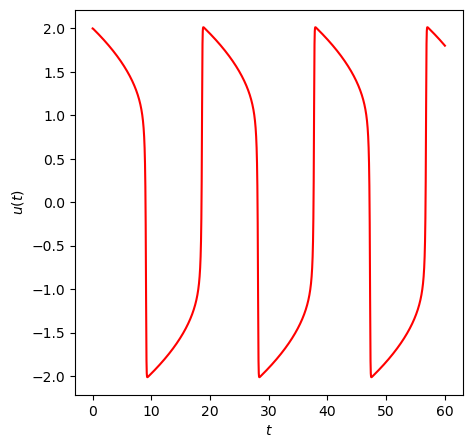

[1.8017549464307172, -0.07991493422320181]

PyObject Text(26.0, 0.5, '$u(t)$')

In [258]:
using LinearAlgebra

function func(u,eps)
    rv = ones(2,)
    rv[1] = u[2]
    rv[2] = (1-u[1]^2)*u[2]/eps-u[1]
    return rv
end

function rk4(N,T,dt,u0,eps)
    u = zeros(N+1, length(u0))'
    u[:,1] = u0;
    for i = 1:N
        k1 = dt*func(u[:,i], eps)
        k2 = dt*func(u[:,i] + k1/2, eps)
        k3 = dt*func(u[:,i] + k2/2, eps)
        k4 = dt*func(u[:,i] + k3, eps)
        u[:,i+1] = u[:,i] + (k1 + 2*k2 + 2*k3 + k4)/6
    end
    return u
end

using PyPlot

##############################
T = 60.0
dt = 0.001
N = round(Int64,T/dt)
t = collect(0:N)*dt
eps=0.1
u0 = [2.0,0.0]

# RK4
urk4 = rk4(N,T,dt,u0,eps)
print(urk4[:,(size(urk4)[2])])

figure(1,figsize=(5,5))
plot(t,vec(urk4[1,:]),"r-")
xlabel(L"t")
ylabel(L"u(t)")

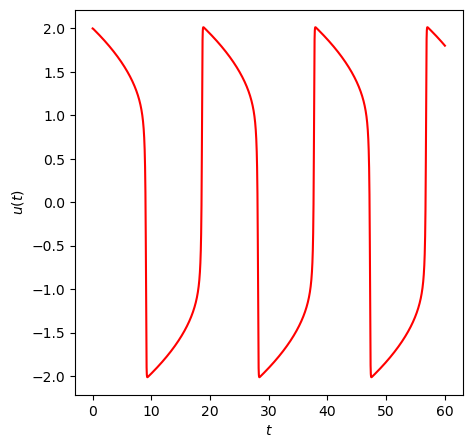

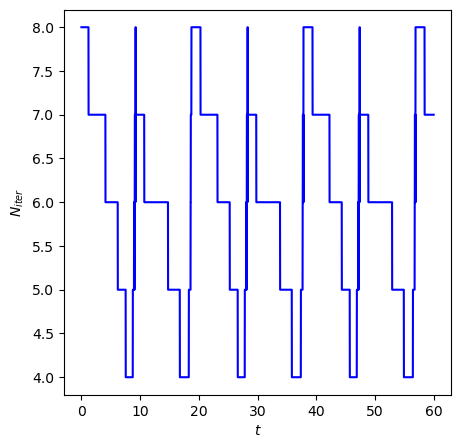

[1.801758150449094, -0.07991467539867855]

PyObject Text(26.4, 0.5, '$N_{iter}$')

In [279]:
# Gauss-Legendre 2-step. Fixed point formulation
# A = [1.0/4.0                       1.0/4.0 - 1.0/6.0*sqrt(3)
#      1.0/4.0 + 1.0/6.0*sqrt(3)     1.0/4.0]
# b = [0.5 0.5]

function gl2fixpoint(N,T,dt,u0,eps,maxIter)
    u = zeros(N+1, length(u0))'
    Niter = zeros(N)
    u[:,1] = u0;
    a11 = 1.0/4.0 
    a12 = 1.0/4.0 - 1.0/6.0*sqrt(3)
    a21 = 1.0/4.0 + 1.0/6.0*sqrt(3) 
    a22 = 1.0/4.0
    for i = 1:N
        k1 = dt*func(u[:,i].+a11.+a12, eps)
        k2 = dt*func(u[:,i].+a21.+a22, eps)
        iters = 0
        while true
            tempk1 = dt*func(u[:,i].+a11*k1.+a12*k2,eps)
            tempk2 = dt*func(u[:,i].+a21*k1.+a22*k2,eps)
            if norm([k1-tempk1, k2-tempk2]) < 1e-8 || iters > maxIter
                break
            end
            k1, k2 = tempk1, tempk2
            iters += 1
        end
        Niter[i] = iters
        u[:,i+1] = u[:,i] + 1/2*(k1 + k2)
    end
    return u,Niter
end

##############################
T = 60.0
dt = 0.01
N = round(Int64,T/dt)
t = collect(0:N)*dt
eps=0.1
w = pi
u0 = [2.0,0.0]

# GL 2-step fixed point
ugl2fixpoint,Niter = gl2fixpoint(N,T,dt,u0,eps,500)
print(ugl2fixpoint[:,(size(ugl2fixpoint)[2])])

figure(1,figsize=(5,5))
plot(t,vec(ugl2fixpoint[1,:]),"r-")
xlabel(L"t")
ylabel(L"u(t)")

figure(2,figsize=(5,5))
plot(t[2:N+1],Niter,"b-")
xlabel(L"t")
ylabel(L"N_{iter}")

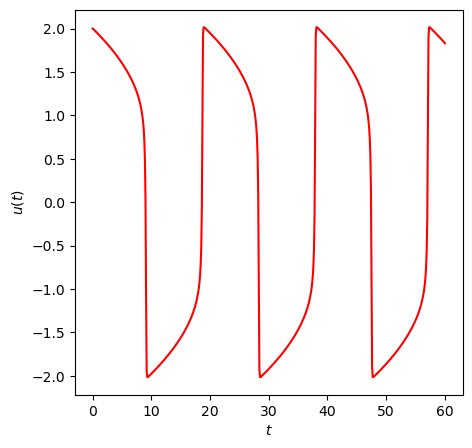

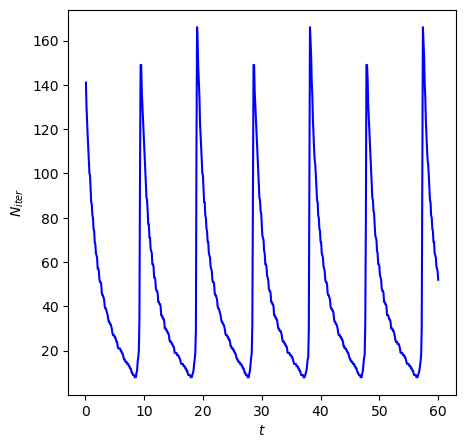

[1.8318325094258936, -0.0775103626679768]

PyObject Text(26.4, 0.5, '$N_{iter}$')

In [280]:
T = 60.0
dt = 0.1
N = round(Int64,T/dt)
t = collect(0:N)*dt
eps=0.1
w = pi
u0 = [2.0,0.0]

# GL 2-step fixed point
ugl2fixpoint,Niter = gl2fixpoint(N,T,dt,u0,eps,500)
print(ugl2fixpoint[:,(size(ugl2fixpoint)[2])])

figure(1,figsize=(5,5))
plot(t,vec(ugl2fixpoint[1,:]),"r-")
xlabel(L"t")
ylabel(L"u(t)")

figure(2,figsize=(5,5))
plot(t[2:N+1],Niter,"b-")
xlabel(L"t")
ylabel(L"N_{iter}")

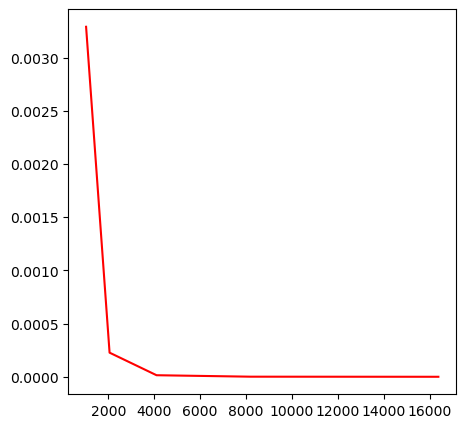

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000007C6253A0>

In [283]:
T = 60.0
N = [2^10 2^11 2^12 2^13 2^14]
dt = T./N
eps=0.1
w = pi
u0 = [2.0,0.0]
errorarr = zeros(5)
sln = urk4[:,(size(urk4)[2])][1]

for i = 1:5
    ugl2, _ = gl2fixpoint(N[i],T,dt[i],u0,eps,500)
    errorarr[i] = norm(sln - ugl2[:,(size(ugl2)[2])][1])
end

using PyPlot
figure(1,figsize=(5,5))
plot(N',errorarr,"r-")

As $h$ gets larger, GL2 converges to the solution given by RK4, which is an order 4 method. Thus GL2 is also an order 4 method.

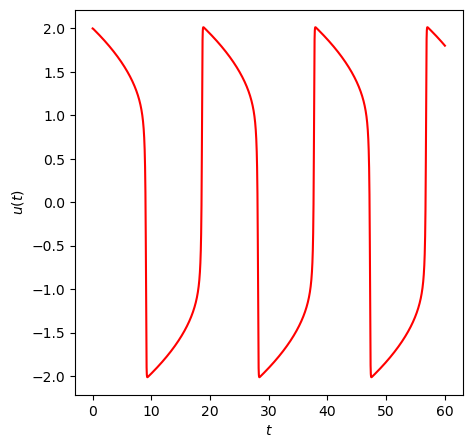

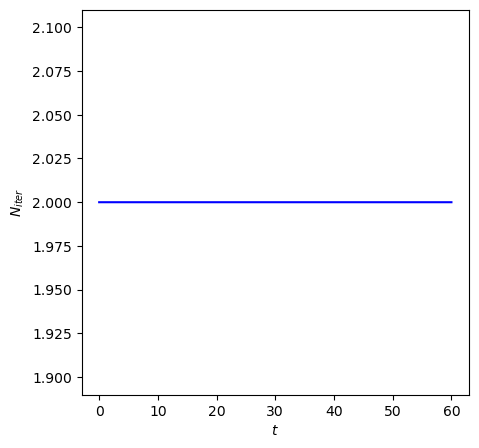

1.8017581439628183

PyObject Text(26.39999999999999, 0.5, '$N_{iter}$')

In [285]:
function dfunc(u,eps)
    rv = ones(2,2)
    rv[1,:] = [0,1]
    rv[2,:] = [-2*u[1]*u[2]/eps-1,(1-u[1]^2)/eps]
    return rv
end

function invdfunc(u,eps)
    rv = ones(2,2)
    rv[1,:] = [(1-u[1]^2)/eps,-1]
    rv[2,:] = [(2*u[1]*u[2]/eps)+1,0]
    det = 1/((2*u[1]*u[2]/eps)-1)
    return det*rv
end

function gl2Newton(N,T,dt,u0,eps,maxIter)
    u = zeros(N+1, length(u0))'
    Niter = zeros(N)
    u[:,1] = u0;
    a11 = 1.0/4.0 
    a12 = 1.0/4.0 - 1.0/6.0*sqrt(3)
    a21 = 1.0/4.0 + 1.0/6.0*sqrt(3) 
    a22 = 1.0/4.0
    for i = 1:N
        k1 = dt*func(u[:,i].+a11.+a12, eps)
        k2 = dt*func(u[:,i].+a21.+a22, eps)
        iters = 0
        while true
            j1 = dfunc(u[:,i].+a11*k1.+a12*k2,eps)
            j2 = dfunc(u[:,i].+a21*k1.+a22*k2,eps)
            j = [I-dt*a11*j1 -dt*a12*j1; -dt*a21*j2 I-dt*a22*j2]
            #tempk1 = k1-dfunc(k1,eps)\
            #    (k1-dt*func(u[:,i].+a11*k1.+a12*k2,eps))
            #tempk2 = k2-dfunc(k2,eps)\
            #    (k2-dt*func(u[:,i].+a21*k1.+a22*k2,eps))
            kerr = [k1.-dt*func(u[:,i].+a11*k1.+a12*k2,eps);k2.-dt*func(u[:,i].+a21*k1.+a22*k2,eps)]
            knext = [k1;k2] - j\kerr
            if norm(kerr) < 1e-8 || iters > maxIter
                break
            end
            k1, k2 = knext[1:2], knext[3:4]
            iters += 1
        end
        Niter[i] = iters
        u[:,i+1] = u[:,i] + 1/2*(k1 + k2)
    end
    return u,Niter
end


##############################
T = 60.0
dt = 0.01
N = round(Int64,T/dt)
t = collect(0:N)*dt
eps=0.1
w = pi
u0 = [2.0,0.0]

# GL 2-step Newton
ugl2Newton,Niter = gl2Newton(N,T,dt,u0,eps,100)
print(ugl2Newton[:,(size(ugl2Newton)[2])][1])

using PyPlot
figure(1,figsize=(5,5))
plot(t,vec((ugl2Newton[1,:])),"r-")
xlabel(L"t")
ylabel(L"u(t)")

figure(2,figsize=(5,5))
plot(t[2:N+1],Niter,"b-")
xlabel(L"t")
ylabel(L"N_{iter}")

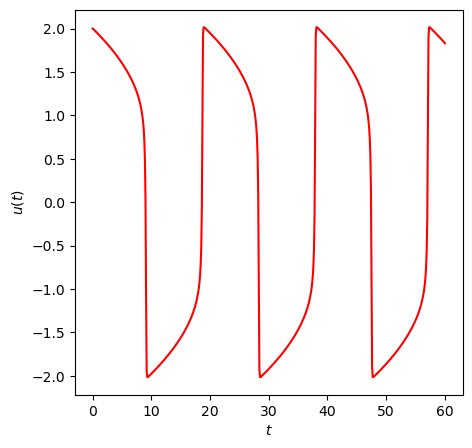

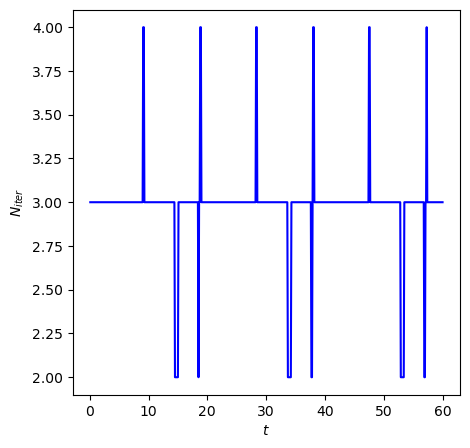

1.831832509586112

PyObject Text(26.4, 0.5, '$N_{iter}$')

In [286]:
T = 60.0
dt = 0.1
N = round(Int64,T/dt)
t = collect(0:N)*dt
eps=0.1
w = pi
u0 = [2.0,0.0]

# GL 2-step Newton
ugl2Newton,Niter = gl2Newton(N,T,dt,u0,eps,100)
print(ugl2Newton[:,(size(ugl2Newton)[2])][1])

using PyPlot
figure(1,figsize=(5,5))
plot(t,vec((ugl2Newton[1,:])),"r-")
xlabel(L"t")
ylabel(L"u(t)")

figure(2,figsize=(5,5))
plot(t[2:N+1],Niter,"b-")
xlabel(L"t")
ylabel(L"N_{iter}")

## Problem 7

Here is a way to solve linear systems of equations $Ax = b$ using a quantum computer. $A$ is a $d\times d$ positive definite matrix and $b$ is a $d$-dimensional vector. In quantum computing, one way to approximate the solution $x$ is by propagating the following ODE

$$ i \frac{1}{S} \frac{d}{dt} u(t) = H(t)u(t), \quad u(t) \in \mathbb{C}^d, \quad 0 \leq t \leq 1$$

given the initial condition $u(0) = b/\|b\|_2$. Here $H(t) = (1-t)Q_b + tAQ_bA$ where $Q_b = I - bb^{\top}$ is the projector onto the subspace $\{b\}^{\perp}$, and $S$ is a prefixed positive constant. It can be shown that when $S \rightarrow +\infty$, the exact solution $u(1)$ will, in some sense, approximate $x_n = A^{-1}b/\|A^{-1}b\|_2$, the normalized solution of the linear system. 

Consider 

$$A = \frac{1}{6}\left(\begin{array}{ccc}
  4 & 1 & 1\\
  1 & 3 & 1\\
  1 & 1 & 2\\
\end{array}\right)$$

and 

$$b = \frac{1}{\sqrt{3}}\left(\begin{array}{c}
  1 \\
  1\\
  1\\
\end{array}\right).$$

a) Write a function using Gauss–Legendre method of order four (i.e. 2-step Gauss-Legendre) for time discretization. Solve the ODE for $S = 10^4$ with time step sizes $h = 10^{-k}, k = 1,2,3,4,5$, and compute $\|u(1)u^*(1) - x_nx^*_n\|_2$, where $u^*$ is the conjugate transpose of $u$.  

b) Repeat part a) using RK4 method. Compare the results with part a) and explain the difference.  

c) Solve the ODE again for $S = 1000,2000,5000,10000$, respectively, using Gauss–Legendre method of order four with sufficiently small time step size. Plot $\|u(1)u^*(1) - x_nx^*_n\|_2$ v.s. the choices of $S$ in a loglog plot and estimate the slope of the loglog plot. How does $\|u(1)u^*(1) - x_nx^*_n\|_2$ depend on $S$? 


In [6]:
using LinearAlgebra 

A = [4 1 1;1 3 1;1 1 2]/6
b = [1;1;1]/sqrt(3)

Qb = I - b*transpose(b)
u0 = b/norm(b)

x_exact = A\b
x_exact = x_exact/norm(x_exact)

function H(t)
    return (1-t)*Qb+t*A*Qb*A
end

#println(size(u0))
#println(size(H(0.01)))

function func(u,t,S)
    return ((1-t)*Qb+t*A*Qb*A)*u*S*(-im)
end

function gl2fixpoint(N,T,dt,u0,eps,maxIter)
    u = zeros(ComplexF64, N+1, length(u0))'
    Niter = zeros(N)
    u[:,1] = u0;
    t = collect(0:dt:T)
    a11 = 1.0/4.0 
    a12 = 1.0/4.0 - 1.0/6.0*sqrt(3)
    a21 = 1.0/4.0 + 1.0/6.0*sqrt(3)
    a22 = 1.0/4.0
    for i = 1:N
        k1 = dt*func(u[:,i],t[i]+(a11+a12)*dt,eps)
        k2 = dt*func(u[:,i],t[i]+(a21+a22)*dt,eps)
        iters = 0
        while true
            tempk1 = func(u[:,i].+dt*a11*k1.+dt*a12*k2,t[i]+(a11+a12)*dt,eps)
            tempk2 = func(u[:,i].+dt*a21*k1.+dt*a22*k2,t[i]+(a21+a22)*dt,eps)
            if norm([k1-tempk1, k2-tempk2]) < 1e-8 || iters > maxIter
                break
            end
            k1, k2 = tempk1, tempk2
            iters += 1
        end
        u[:,i+1] = u[:,i] + dt*1/2*(k1 + k2)
    end
    return u,Niter
end

function rk4(N,T,dt,u0,S)
    u = zeros(ComplexF64, N+1, length(u0))'
    u[:,1] = u0;
    t = collect(0:dt:T)
    for i = 1:N
        k1 = dt*func(u[:,i], t[i], S)
        k2 = dt*func(u[:,i] + k1/2, t[i] + dt/2, S)
        k3 = dt*func(u[:,i] + k2/2, t[i] + dt/2, S)
        k4 = dt*func(u[:,i] + k3, t[i] + dt, S)
        u[:,i+1] = u[:,i] + (k1 + 2*k2 + 2*k3 + k4)/6
    end
    return u
end

S = 1e4
T = 1
dt = [1e-1 1e-2 1e-3 1e-4 1e-5]

for i in 1:5
    println("dt = ", dt[i])
    N = round(Int64,T/dt[i])
    ugl2, _ = gl2fixpoint(N,T,dt[i],u0,S,500)
    solgl2 = abs.(ugl2[:,end])
    resultgl2 = norm(solgl2*solgl2' - x_exact*x_exact')
    println(solgl2)
    println(resultgl2)

    urk4 = rk4(N,T,dt[i],u0,S)
    solrk4 = abs.(urk4[:,end])
    resultrk4 = norm(solrk4*solrk4' - x_exact*x_exact')
    println(solrk4)
    println(resultrk4)
end
println("exact = ", x_exact)

dt = 0.1
[NaN, NaN, NaN]
NaN
[1.4321463937079572e90, 6.513055285449813e89, 1.517315981446265e89]
2.4982646623994867e180
dt = 0.01
[NaN, NaN, NaN]
NaN
[NaN, NaN, NaN]
NaN
dt = 0.001
[NaN, NaN, NaN]
NaN
[NaN, NaN, NaN]
NaN
dt = 0.0001
[0.2858192129697372, 0.42887219384372555, 0.856957419505275]
0.0005212611452510518
[0.285820933142121, 0.4288695125864589, 0.8569581875887676]
0.0005183253680300601
dt = 1.0e-5
[0.28582163322418347, 0.42886855341484875, 0.8569584341570677]
0.0005173364353480691
[0.2858216287739961, 0.42886855796553425, 0.8569584333639091]
0.0005173403813236254
exact = [0.2857142857142857, 0.4285714285714286, 0.8571428571428571]


The results are similar, since both are of order 4.

[0.2934712084748825, 0.449756914112167, 0.8435599374096677]
[0.2881462167738894, 0.4353232745037478, 0.8529158249384456]
[0.2861338231176908, 0.4297457826424591, 0.8564146177927271]


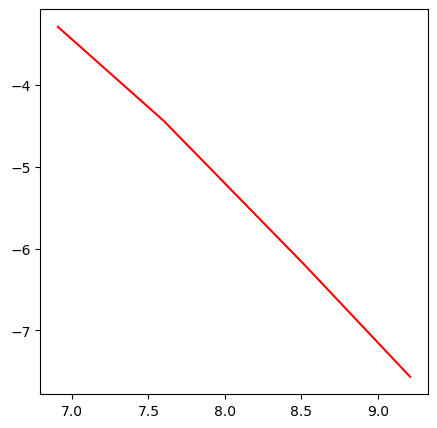

[0.28582163322418347, 0.42886855341484875, 0.8569584341570677]


1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006CB87A00>

In [7]:
S = [1000 2000 5000 10000]
T = 1
dt = 1e-5
N = round(Int64,T/dt)
errorarr = zeros(4)

for i = 1:4
    ugl2, _ = gl2fixpoint(N,T,dt,u0,S[i],500)
    solgl2 = abs.(ugl2[:,end])
    println(solgl2)
    errorarr[i] = norm(solgl2*solgl2' - x_exact*x_exact')
end

using PyPlot
figure(1,figsize=(5,5))
plot(log.(S)',log.(errorarr),"r-")